In [1]:
import os

import nibabel as nb
import numpy as np
from functions import convert_samples_to_features, edit_events_full, extract_samples
from nilearn import image, plotting

In [2]:
# data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
data_root = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2"  # sim01 dir

derivatives_dir = os.path.join(data_root, "derivatives")

fmriprep_dir = os.path.join(derivatives_dir, "fmriprep23")  # fmriprep output
func_dir = os.path.join(derivatives_dir, "func_clean")  # cleaned bold images
stab_mask_dir = os.path.join(derivatives_dir, "mvpa_08_stability_bold", "stab_full_masks")  # for stability masks
output_feat_full_dir = os.path.join(derivatives_dir, "mvpa_08_stability_bold", "features_full")  # for full features

In [3]:
# check if output directories exist and create them if not
if not os.path.exists(output_feat_full_dir):
    os.makedirs(output_feat_full_dir)

# All subject iteration

In [ ]:
from concurrent.futures import ThreadPoolExecutor

subject_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]
run_list = ["1", "2", "3", "4"]


def process_subject(subject):
    print(f"Processing subject {subject}")
    stab_mask_data = np.load(os.path.join(stab_mask_dir, f"sub-{subject}_STAB.npy"))
    example_func = nb.load(os.path.join(func_dir, f"sub-{subject}_ses-01_task-02a_run-1_cleaned.nii.gz"))

    # generate image
    stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)

    # threshold the stability map
    thres = 0.1
    stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
    stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)  # FIXME it would be wise to save this image, oh well

    for run in run_list:
        if subject == "18" and run == "2":
            continue

        # load cleaned image
        img_clean = nb.load(os.path.join(func_dir, f"sub-{subject}_ses-01_task-02a_run-{run}_cleaned.nii.gz"))

        # extract samples from the cleaned inside the stability mask
        samples = extract_samples(img_clean, stab_mask_img_thres_bin, subject, run)

        # load and edit the events for classification
        events_split_2 = edit_events_full(data_root, subject, run)

        # convert samples to features
        convert_samples_to_features(samples, output_feat_full_dir, events_split_2, subject, run)


with ThreadPoolExecutor(max_workers=10) as executor:
    executor.map(process_subject, subject_list)

Processing subject 01
Processing subject 02
Processing subject 03
Processing subject 04
Processing subject 05
Processing subject 06
Processing subject 07
Processing subject 08
Processing subject 09
Processing subject 10


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 01, run 1...
Extracting samples for subject 05, run 1...
Extracting samples for subject 06, run 1...
Extracting samples for subject 03, run 1...
Extracting samples for subject 08, run 1...
Extracting samples for subject 07, run 1...
Extracting samples for subject 09, run 1...
Extracting samples for subject 02, run 1...
Extracting samples for subject 04, run 1...
Extracting samples for subject 10, run 1...
Samples extracted for subject 10, run 1.
Editing events for subject 10, run 1...
Samples extracted for subject 08, run 1.
Editing events for subject 08, run 1...
Events edited for subject 10, run 1.
Converting samples to features for subject 10, run 1...
Events edited for subject 08, run 1.
Converting samples to features for subject 08, run 1...
Features extracted and labels saved for subject 10, run 1.
Features extracted and labels saved for subject 08, run 1.
Extracting samples for subject 10, run 2...
Extracting samples for subject 08, run 2...
Sample

/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 11, run 1...
Samples extracted for subject 10, run 4.
Editing events for subject 10, run 4...
Samples extracted for subject 04, run 4.
Editing events for subject 04, run 4...
Events edited for subject 10, run 4.
Converting samples to features for subject 10, run 4...
Events edited for subject 04, run 4.
Converting samples to features for subject 04, run 4...
Features extracted and labels saved for subject 04, run 4.
Processing subject 12
Features extracted and labels saved for subject 10, run 4.
Processing subject 13


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Samples extracted for subject 02, run 4.
Editing events for subject 02, run 4...
Extracting samples for subject 13, run 1...
Events edited for subject 02, run 4.
Converting samples to features for subject 02, run 4...
Extracting samples for subject 12, run 1...
Features extracted and labels saved for subject 02, run 4.
Processing subject 14


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 14, run 1...
Samples extracted for subject 09, run 4.
Editing events for subject 09, run 4...
Events edited for subject 09, run 4.
Converting samples to features for subject 09, run 4...
Features extracted and labels saved for subject 09, run 4.
Processing subject 15


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 15, run 1...
Samples extracted for subject 05, run 4.
Editing events for subject 05, run 4...
Events edited for subject 05, run 4.
Converting samples to features for subject 05, run 4...
Features extracted and labels saved for subject 05, run 4.
Processing subject 16


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Samples extracted for subject 07, run 4.
Editing events for subject 07, run 4...
Extracting samples for subject 16, run 1...
Events edited for subject 07, run 4.
Converting samples to features for subject 07, run 4...
Features extracted and labels saved for subject 07, run 4.
Processing subject 17


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 17, run 1...
Samples extracted for subject 06, run 4.
Editing events for subject 06, run 4...
Events edited for subject 06, run 4.
Converting samples to features for subject 06, run 4...
Features extracted and labels saved for subject 06, run 4.
Processing subject 18


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 18, run 1...
Samples extracted for subject 01, run 4.
Editing events for subject 01, run 4...
Events edited for subject 01, run 4.
Converting samples to features for subject 01, run 4...
Features extracted and labels saved for subject 01, run 4.
Processing subject 19


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 19, run 1...
Samples extracted for subject 03, run 4.
Editing events for subject 03, run 4...
Events edited for subject 03, run 4.
Converting samples to features for subject 03, run 4...
Features extracted and labels saved for subject 03, run 4.
Processing subject 20


/tmp/ipykernel_4162219/4031480303.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, two_sided=False)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


Extracting samples for subject 20, run 1...
Samples extracted for subject 11, run 1.
Editing events for subject 11, run 1...
Events edited for subject 11, run 1.
Converting samples to features for subject 11, run 1...
Features extracted and labels saved for subject 11, run 1.
Extracting samples for subject 11, run 2...
Samples extracted for subject 13, run 1.
Editing events for subject 13, run 1...
Samples extracted for subject 14, run 1.
Editing events for subject 14, run 1...
Events edited for subject 13, run 1.
Converting samples to features for subject 13, run 1...
Events edited for subject 14, run 1.
Converting samples to features for subject 14, run 1...
Features extracted and labels saved for subject 13, run 1.
Features extracted and labels saved for subject 14, run 1.
Extracting samples for subject 13, run 2...
Extracting samples for subject 14, run 2...
Samples extracted for subject 15, run 1.
Editing events for subject 15, run 1...
Events edited for subject 15, run 1.
Convert

# Single subject

In [31]:
subject = "18"

In [ ]:
stab_mask_data = np.load(os.path.join(stab_mask_dir, f"sub-{subject}_STAB.npy"))
example_func = nb.load(os.path.join(func_dir, f"sub-{subject}_ses-01_task-02a_run-1_cleaned.nii.gz"))

# generate image
stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)

# threshold the stability map
thres = 0.1  # TODO is this a good threshold?
stab_mask_img_thres = image.threshold_img(
    stab_mask_img, threshold=thres, cluster_threshold=5, two_sided=False
)  # FIXME this was two-sided before and did not have cluster threshold
stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

/tmp/ipykernel_3557676/1938714154.py:9: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres, cluster_threshold=5, two_sided=False)  # FIXME this was two-sided before!
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1245: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img=threshold_img(


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



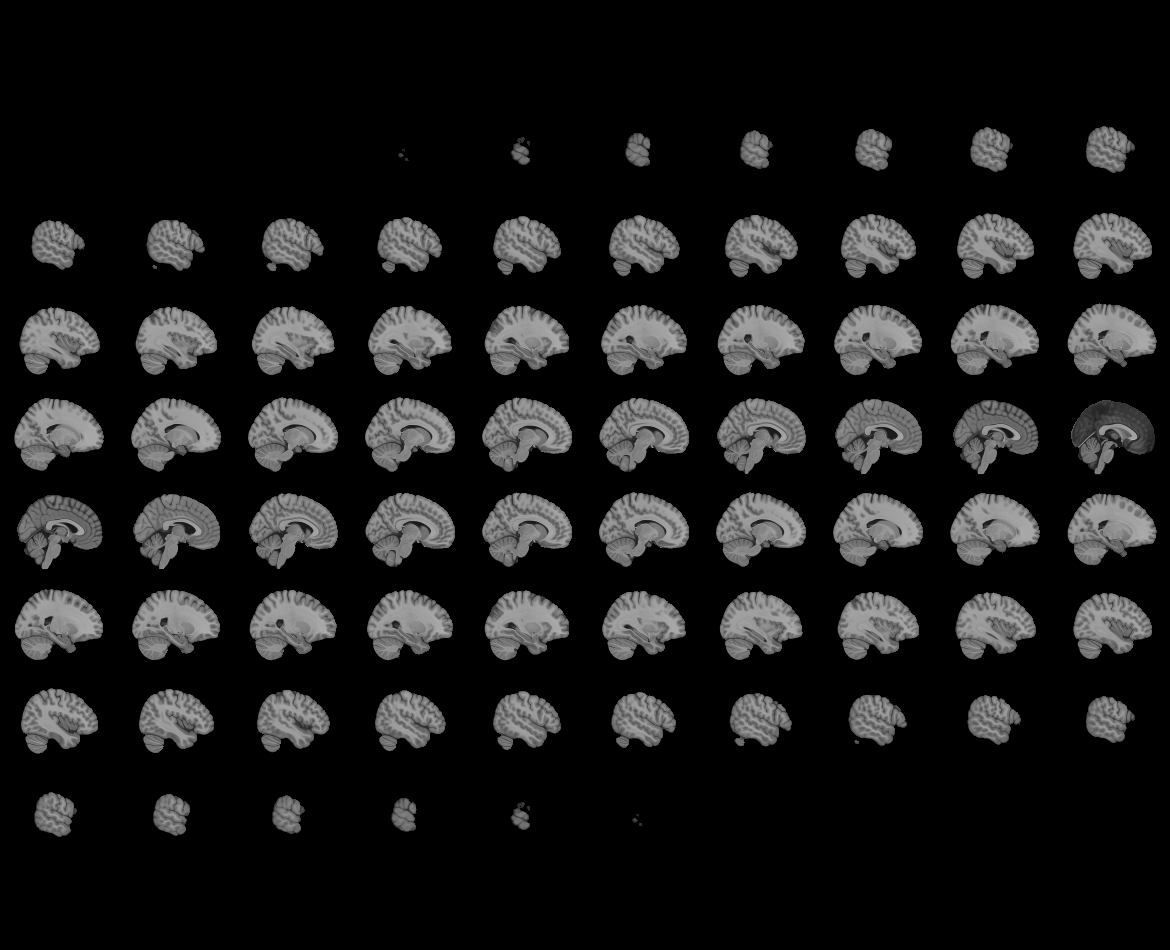
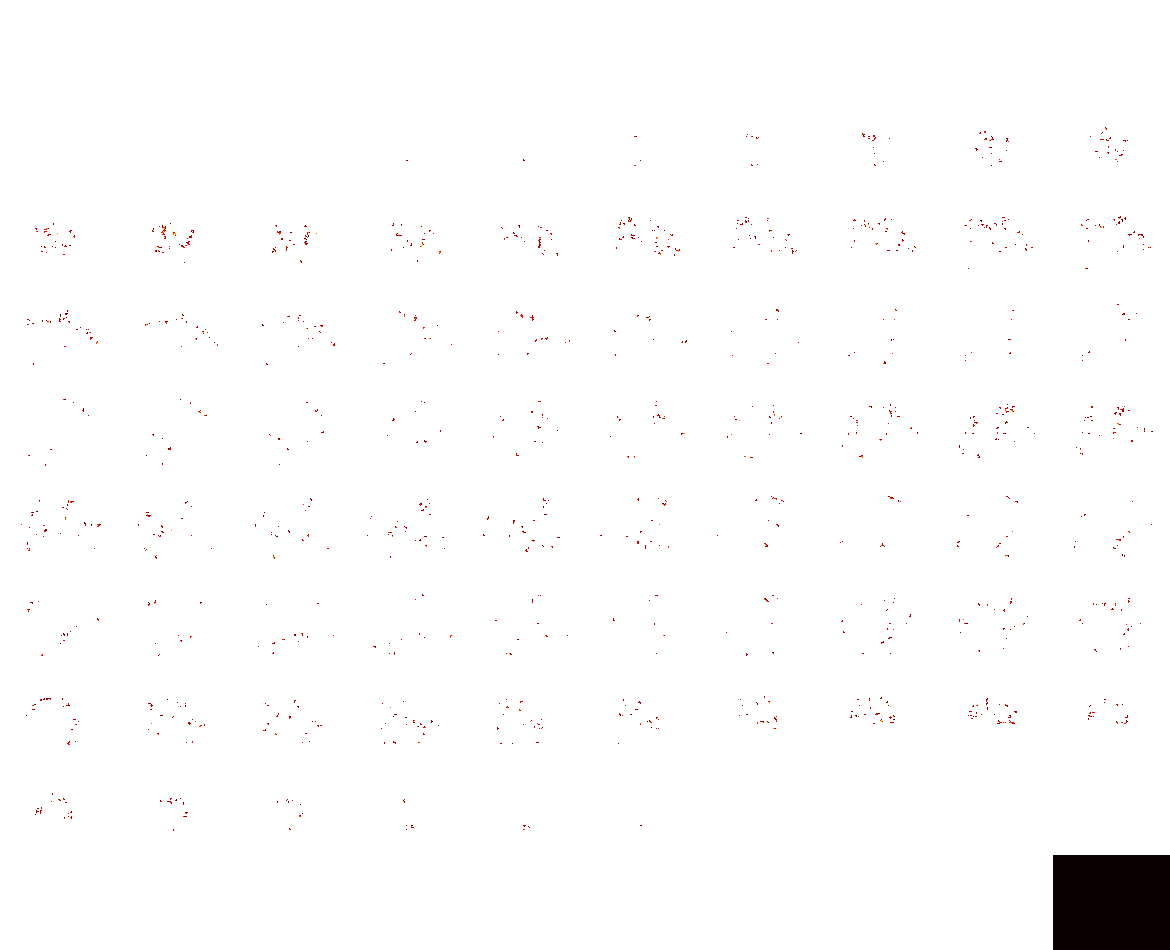

In [36]:
plotting.view_img(stab_mask_img_thres, colorbar=True, symmetric_cmap=False, cmap="hot")

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



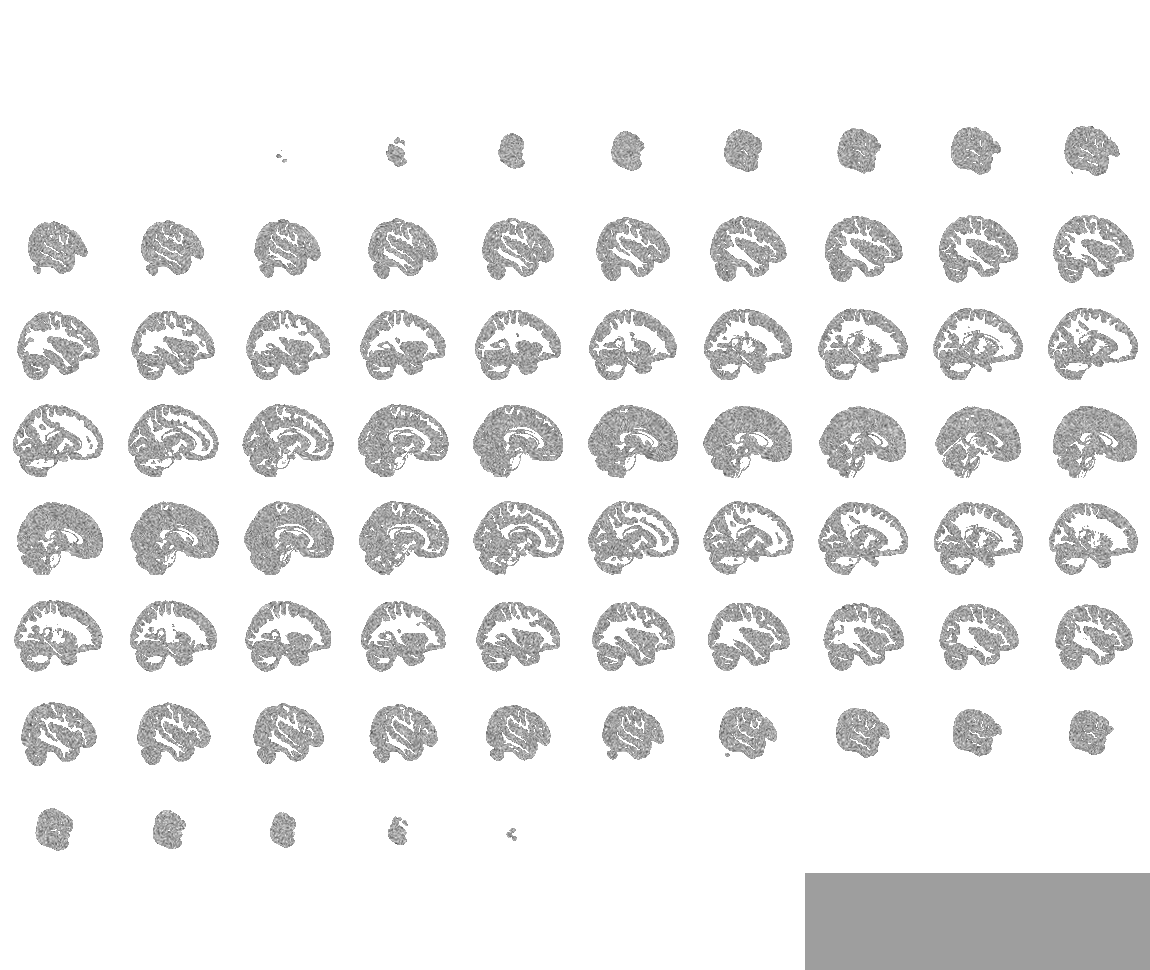
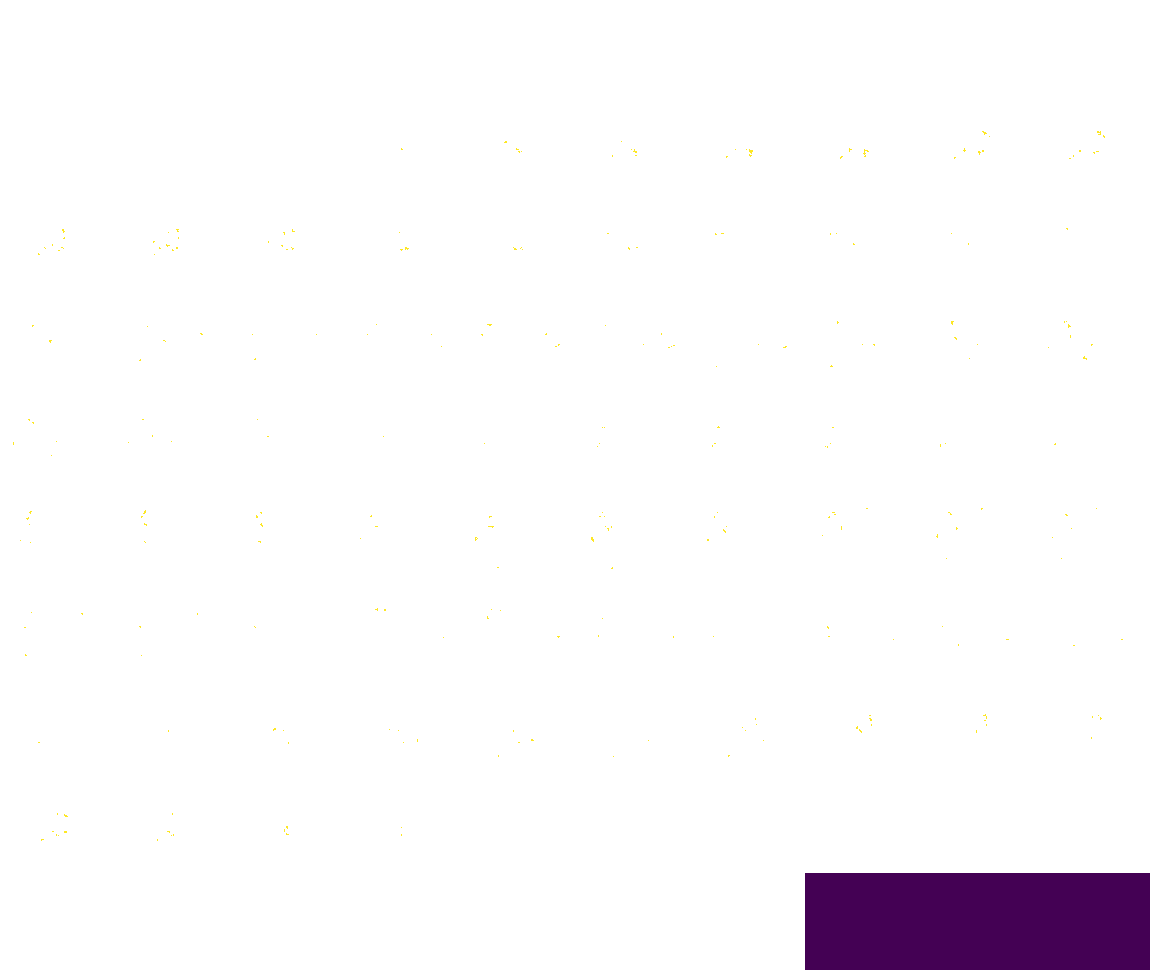

In [22]:
plotting.view_img(
    stab_mask_img_thres_bin,
    title=f"stability mask for subject {subject}",
    colorbar=True,
    cmap="viridis",
    symmetric_cmap=False,
    bg_img=example_func.slicer[..., 0],
)

In [37]:
np.sum(stab_mask_img_thres_bin.get_fdata())

2722.0

In [239]:
# save stability mask
# stab_mask_img_thres.to_filename()

In [ ]:
# for run in ["1", "3", "4"]: # this one is for sub-18
for run in ["1", "2", "3", "4"]:
    # load cleaned image
    img_clean = nb.load(os.path.join(func_dir, f"sub-{subject}_ses-01_task-02a_run-{run}_cleaned.nii.gz"))

    # extract samples from the cleaned inside the stability mask
    samples = extract_samples(img_clean, stab_mask_img_thres_bin, subject, run)

    # load and edit the events for classification
    events_split_2 = edit_events_full(data_root, subject, run)

    # convert samples to features
    convert_samples_to_features(samples, output_feat_full_dir, events_split_2, subject, run)

Extracting samples for subject 18, run 1...
Samples extracted for subject 18, run 1.
Editing events for subject 18, run 1...
Events edited for subject 18, run 1.
Converting samples to features for subject 18, run 1...
Features extracted and labels saved for subject 18, run 1.
Extracting samples for subject 18, run 3...
Samples extracted for subject 18, run 3.
Editing events for subject 18, run 3...
Events edited for subject 18, run 3.
Converting samples to features for subject 18, run 3...
Features extracted and labels saved for subject 18, run 3.
Extracting samples for subject 18, run 4...
Samples extracted for subject 18, run 4.
Editing events for subject 18, run 4...
Events edited for subject 18, run 4.
Converting samples to features for subject 18, run 4...
Features extracted and labels saved for subject 18, run 4.
